In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1pXPFDKFRANYq4R6JS9t-j-JcUR6Nfq5w
!gdown --id 1fN_rJgZIuE4-RVMychy2QwQvkWY1dwGj
!gdown --id 1rwqkQjqRl8qXCgCnCYOk8BC4daB4PLch

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pXPFDKFRANYq4R6JS9t-j-JcUR6Nfq5w
To: /content/train.csv
100% 289k/289k [00:00<00:00, 101MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fN_rJgZIuE4-RVMychy2QwQvkWY1dwGj
To: /content/val.csv
100% 61.9k/61.9k [00:00<00:00, 74.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rwqk

In [ ]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 0
tf.random.set_seed(seed)
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test  = pd.read_csv('test.csv')

In [ ]:
train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,4,0,0,0,0,0,6,1563,1469,PortScan
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,3,0,0,0,0,0,4,14774,14647,Blackhole
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,2,0,0,0,0,0,8,2688,2590,TCP-SYN
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,2,630355,6303550,630355,6303550,630355,6,3088,2976,Blackhole


In [ ]:
X_train=train.drop('Label',axis=1)
y_train=train['Label']
X_test=test.drop('Label',axis=1)
y_test=test['Label']
X_val=val.drop('Label',axis=1)
y_val=val['Label']
X_train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,5,1,0,0,0,0,0,4,819,757
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,5,2,0,0,0,0,0,5,1018,918
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,5,2,0,0,0,0,0,8,987400,987276
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,4,3,0,0,0,0,0,8,195879,195780
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,5,1,0,0,0,0,0,4,4524,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,5,4,0,0,0,0,0,6,1563,1469
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,5,3,0,0,0,0,0,4,14774,14647
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,4,2,0,0,0,0,0,8,2688,2590
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,5,2,630355,6303550,630355,6303550,630355,6,3088,2976


In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,240,16586,12622603,467,126,0,0,280,2,5,...,False,False,False,False,False,False,False,False,False,False
1,158,20530,35464,376,171,4,556,3407,43,5,...,False,False,False,False,False,False,False,True,False,False
2,1930,37881404,67857371,414333,1297,0,0,556,4,5,...,False,False,True,False,False,False,False,False,True,False
3,903,18946410,17900326,98088,176,3,320,270280,5002,4,...,False,False,False,False,False,False,False,False,False,True
4,423,29020,19138042,1562,1451,0,0,560,4,5,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,646,18927937,26139,253,151,2,278,278,2,5,...,False,False,True,False,False,False,False,False,False,False
2615,3149,25488846,31784484,3205,2326,4,556,556,4,5,...,False,False,False,False,False,True,False,True,False,False
2616,386,6324623,13285,97,101,27,526635,556,4,4,...,False,False,False,False,False,False,True,False,True,False
2617,807,12638724,25268608,1238,366,47,3379,3939658,105,5,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
y_train.value_counts()

Label
PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: count, dtype: int64

In [ ]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Received Packets               2619 non-null   int64
 1   Received Bytes                 2619 non-null   int64
 2   Sent Bytes                     2619 non-null   int64
 3   Sent Packets                   2619 non-null   int64
 4   Port alive Duration (S)        2619 non-null   int64
 5   Delta Received Packets         2619 non-null   int64
 6   Delta Received Bytes           2619 non-null   int64
 7   Delta Sent Bytes               2619 non-null   int64
 8   Delta Sent Packets             2619 non-null   int64
 9   Delta Port alive Duration (S)  2619 non-null   int64
 10  Connection Point               2619 non-null   int64
 11  Total Load/Rate                2619 non-null   int64
 12  Total Load/Latest              2619 non-null   int64
 13  Unknown Load/Rate 

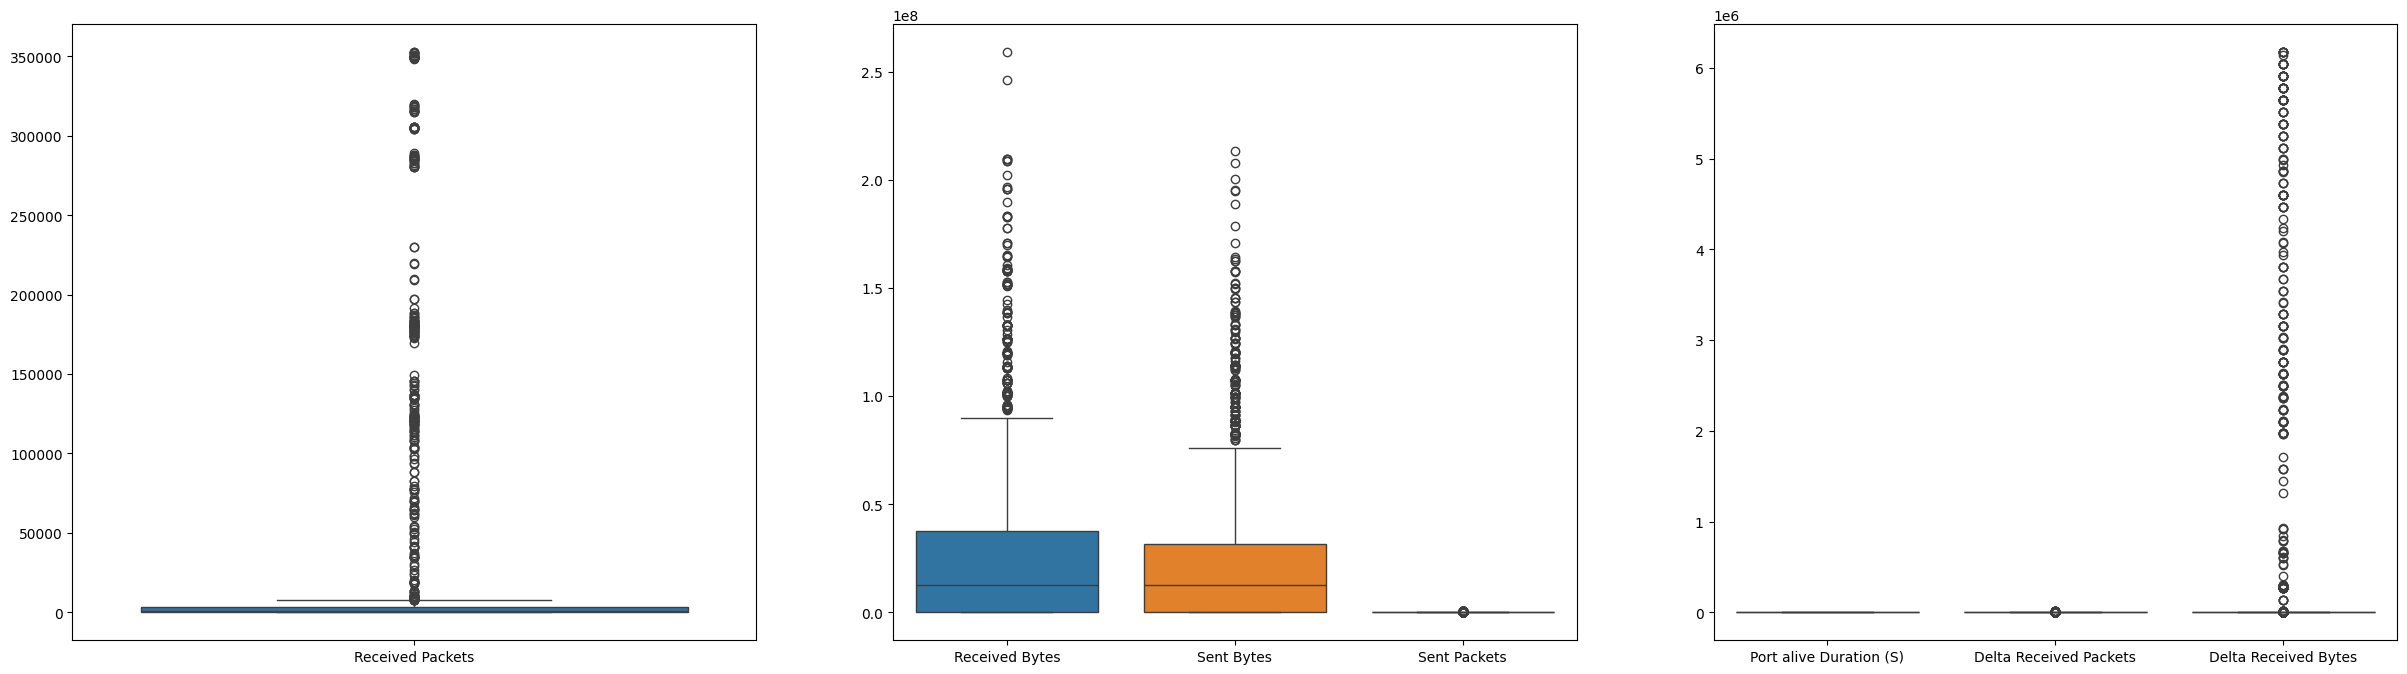

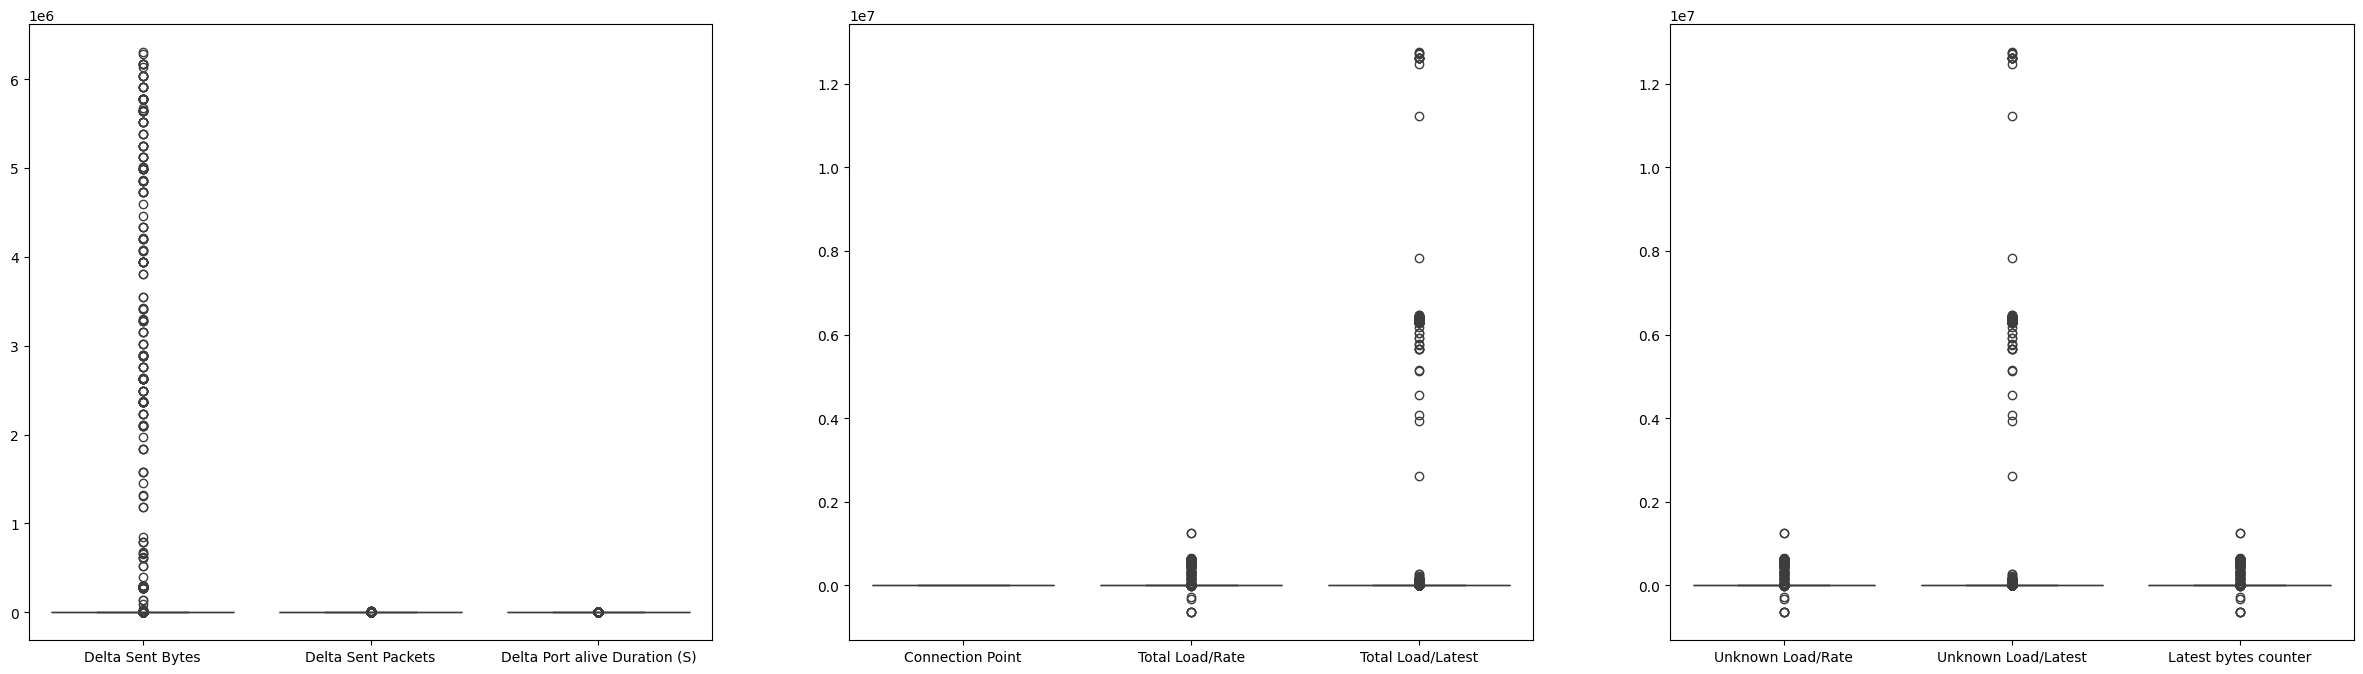

In [ ]:
for i in range(0,18,9) :
    fig,axis =plt.subplots(1,3,figsize=(30,8))
    sns.boxplot(data=X_train.iloc[:,i:i+3],ax=axis[0])
    sns.boxplot(data=X_train.iloc[:,i+3:i+6],ax=axis[1])
    sns.boxplot(data=X_train.iloc[:,i+6:i+9],ax=axis[2])
    plt.show()

In [ ]:
for i,col in enumerate(X_train_numeric.columns):
    if i > 18 :
        break
    q_low = X_train[col].quantile(0.25)
    q_hi  = X_train[col].quantile(0.75)
    IQR = (q_hi-q_low)
    df_filtered = X_train[(X_train[col] > (q_hi + 1.5 * IQR)) | (X_train[col] < (q_low - 1.5 * IQR))]
    print(f'Feature name {col} --> number of outliers is {len(df_filtered)}')

Feature name Received Packets --> number of outliers is 312
Feature name Received Bytes --> number of outliers is 186
Feature name Sent Bytes --> number of outliers is 222
Feature name Sent Packets --> number of outliers is 379
Feature name Port alive Duration (S) --> number of outliers is 0
Feature name Delta Received Packets --> number of outliers is 649
Feature name Delta Received Bytes --> number of outliers is 648
Feature name Delta Sent Bytes --> number of outliers is 604
Feature name Delta Sent Packets --> number of outliers is 604
Feature name Delta Port alive Duration (S) --> number of outliers is 441
Feature name Connection Point --> number of outliers is 0
Feature name Total Load/Rate --> number of outliers is 396
Feature name Total Load/Latest --> number of outliers is 501
Feature name Unknown Load/Rate --> number of outliers is 396
Feature name Unknown Load/Latest --> number of outliers is 501
Feature name Latest bytes counter --> number of outliers is 396
Feature name Act

In [ ]:
X_train_numeric.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_train_numeric.columns)
X_val_scaled= pd.DataFrame(scaler.transform(X_val_numeric), columns = X_val_numeric.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test_numeric), columns = X_test_numeric.columns)
X_train_scaled

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.279034,-0.266725,-0.163127,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,-0.371088
1,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.278558,-0.263902,-0.120959,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,1.437618,-0.571619,-0.371088
2,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.279034,-0.266476,-0.161070,0.449977,...,-0.220088,-0.278887,4.057093,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,1.749419,-0.371088
3,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,-0.278760,-0.022965,4.979328,-2.222336,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,2.694778
4,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.279034,-0.266472,-0.161070,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,4.02868,-0.400487,-0.695595,-0.571619,-0.371088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,-0.311994,-0.194503,-0.716178,-0.369126,-0.761837,-0.168122,-0.278796,-0.266727,-0.163127,0.449977,...,-0.220088,-0.278887,4.057093,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,-0.371088
2615,-0.271496,-0.015737,0.243498,-0.336524,1.478742,-0.166178,-0.278558,-0.266476,-0.161070,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,4.02868,-0.400487,1.437618,-0.571619,-0.371088
2616,-0.316200,-0.537908,-0.716567,-0.370849,-0.813345,-0.143820,0.172470,-0.266476,-0.161070,-2.222336,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,2.496959,-0.695595,1.749419,-0.371088
2617,-0.309389,-0.365867,0.046601,-0.358248,-0.540355,-0.124378,-0.276137,3.289801,-0.057192,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,2.496959,1.437618,-0.571619,-0.371088


In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Received Packets               2619 non-null   float64
 1   Received Bytes                 2619 non-null   float64
 2   Sent Bytes                     2619 non-null   float64
 3   Sent Packets                   2619 non-null   float64
 4   Port alive Duration (S)        2619 non-null   float64
 5   Delta Received Packets         2619 non-null   float64
 6   Delta Received Bytes           2619 non-null   float64
 7   Delta Sent Bytes               2619 non-null   float64
 8   Delta Sent Packets             2619 non-null   float64
 9   Delta Port alive Duration (S)  2619 non-null   float64
 10  Connection Point               2619 non-null   float64
 11  Total Load/Rate                2619 non-null   float64
 12  Total Load/Latest              2619 non-null   f

In [ ]:
X_train_scaled_tensor=tf.convert_to_tensor(X_train_scaled, dtype=np.float64)
X_val_scaled_tensor=tf.convert_to_tensor(X_val_scaled,dtype=np.float64)
X_test_scaled_tensor=tf.convert_to_tensor(X_test_scaled,dtype=np.float64)
X_train_scaled_tensor

<tf.Tensor: shape=(2619, 33), dtype=float64, numpy=
array([[-0.31856254, -0.70978461, -0.33553717, ..., -0.69559521,
        -0.57161851, -0.37108805],
       [-0.31988928, -0.70967715, -0.71589647, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.29121895,  0.32192611,  1.333552  , ..., -0.69559521,
         1.74941851, -0.37108805],
       ...,
       [-0.31620032, -0.53790819, -0.71656668, ..., -0.69559521,
         1.74941851, -0.37108805],
       [-0.30938869, -0.36586654,  0.04660094, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.31362775, -0.53753359, -0.33542854, ...,  1.43761773,
        -0.57161851, -0.37108805]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded

array([5, 5, 2, ..., 5, 0, 5])

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def plot_history(dict_of_lists,type='loss'):
  axis_idx=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
  fig, axes = plt.subplots(2, 3,figsize=(20,10))

  for i in range(len(dict_of_lists)):
    ax=axes[axis_idx[i][0]][axis_idx[i][1]]
    # summarize history for accuracy
    ax.plot(dict_of_lists[i].history[type])
    ax.plot(dict_of_lists[i].history[f'val_{type}'])
    ax.set_title(f'Model {i+1} {type.title()}',size=15)
    ax.set_ylabel(f'{type.title()}',size=10)
    ax.set_xlabel('Epoch',size=10)
    ax.legend(['train', 'test'], loc='upper left')
  plt.suptitle(f'Models {type.title()} per Epoc',size=15,y=.93)
  plt.show()

In [ ]:
def Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation='relu',epochs=500,batch_size=1024,early_stopping=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    for _ in range(n_of_hidden_layers):
      model.add(keras.layers.Dense(n_neurons, activation=activation))
    model.add(keras.layers.Dense(6, activation='softmax'))

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    es=tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        mode="auto",
        baseline=None,
        restore_best_weights=True,)
    # Fit model
    if early_stopping :
        history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size,callbacks=[es],verbose=0)
    else:
        history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose=0)
    # Evaluate the model
    train_evaluation = model.evaluate(X_train, y_train)
    test_evaluation = model.evaluate(X_test, y_test)
    validation_evaluation = model.evaluate(X_val, y_val)
    return model, history, train_evaluation, validation_evaluation ,test_evaluation

In [ ]:
def Build_experment(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                    n_of_hidden_layers,n_neurons,activation='relu',epochs=500,batch_size=1024,n_of_models=5,early_stopping=True):
    models_dict = {'models':[], 'history': []}

    models_train_acc = []
    models_test_acc = []
    models_valid_acc = []
    for j in range(n_of_models):
        # Build model
        model, history, train_evaluation,valid_evaluation, test_evaluation = Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation=activation,epochs=epochs,batch_size=batch_size,early_stopping=early_stopping)
        # Save data
        models_train_acc.append(train_evaluation[1])
        models_test_acc.append(test_evaluation[1])
        models_valid_acc.append(valid_evaluation[1])

        models_dict['models'].append(model)
        models_dict['history'].append(history)

        accuracies_dict={}
        accuracies_dict["Min_train_acc"]=min(models_train_acc)
        accuracies_dict["Max_train_acc"]=max(models_train_acc)
        accuracies_dict["AVG_train_acc"]=mean(models_train_acc)

        accuracies_dict["Min_test_acc"]=min(models_test_acc)
        accuracies_dict["Max_test_acc"]=max(models_test_acc)
        accuracies_dict["AVG_test_acc"]=mean(models_test_acc)

        accuracies_dict["Min_valid_acc"]=min(models_valid_acc)
        accuracies_dict["Max_valid_acc"]=max(models_valid_acc)
        accuracies_dict["AVG_valid_acc"]=mean(models_valid_acc)

    return accuracies_dict, models_dict,models_train_acc,models_test_acc,models_valid_acc



In [ ]:
optimizer=AdamW(learning_rate=0.001, weight_decay=.00001)
base_line_accuracies_dict, base_line_models_dict,base_line_models_train_acc,base_line_models_test_acc,base_line_models_valid_acc = Build_experment(X_train_scaled_tensor, y_train_encoded, X_val_scaled_tensor, y_val_encoded, X_test_scaled_tensor, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=1024, n_of_models=5,early_stopping=False)

18/18 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7522


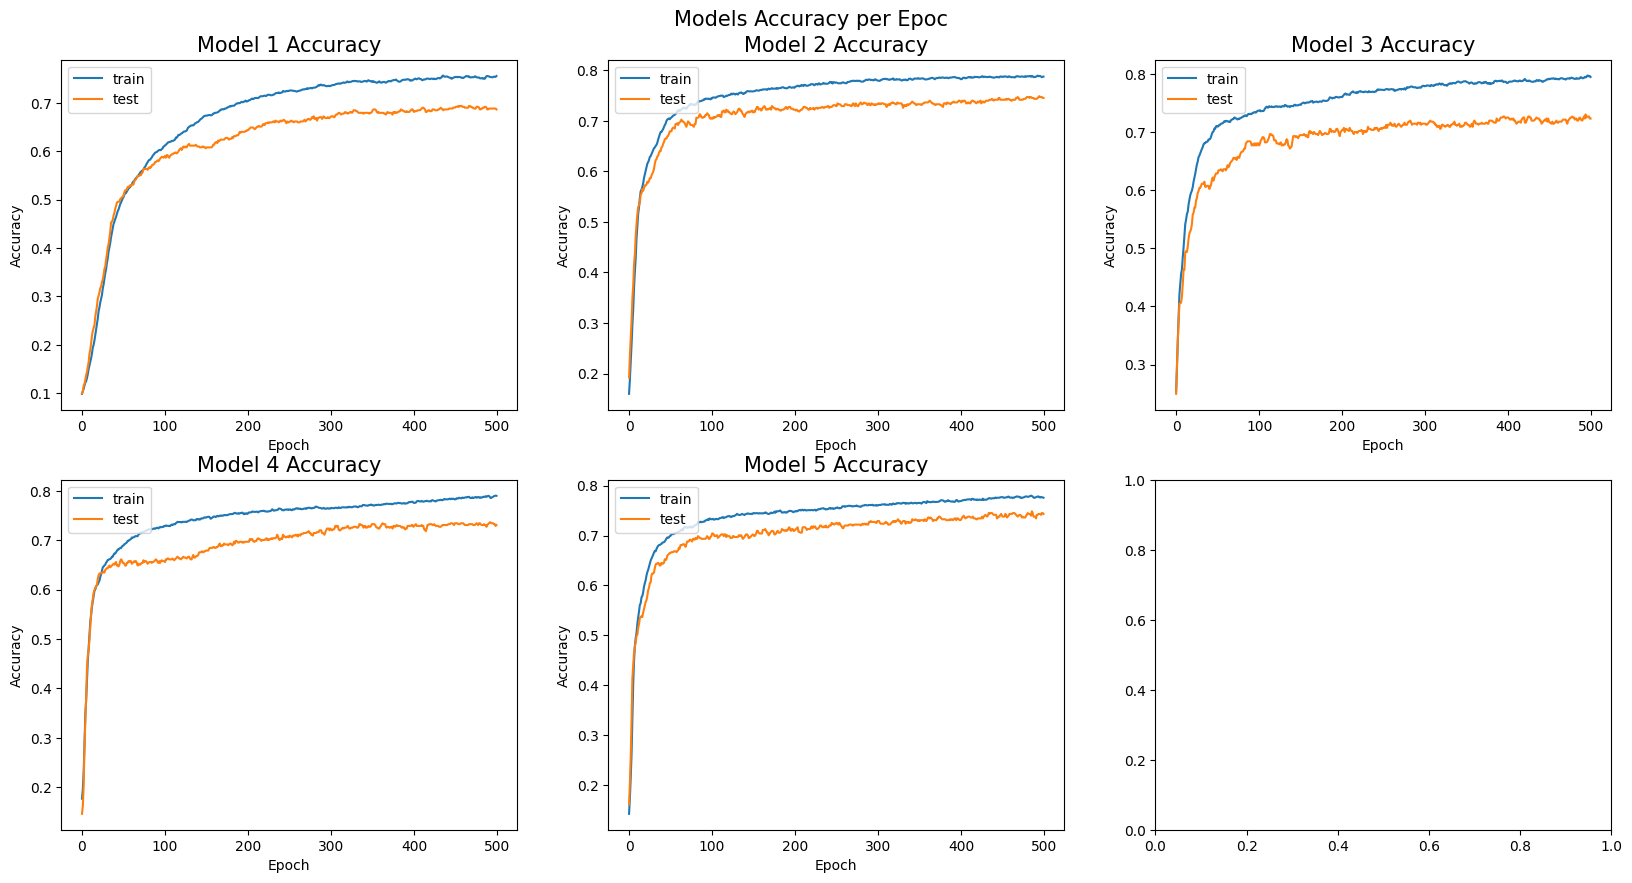

In [ ]:
plot_history(base_line_models_dict['history'],type='accuracy')

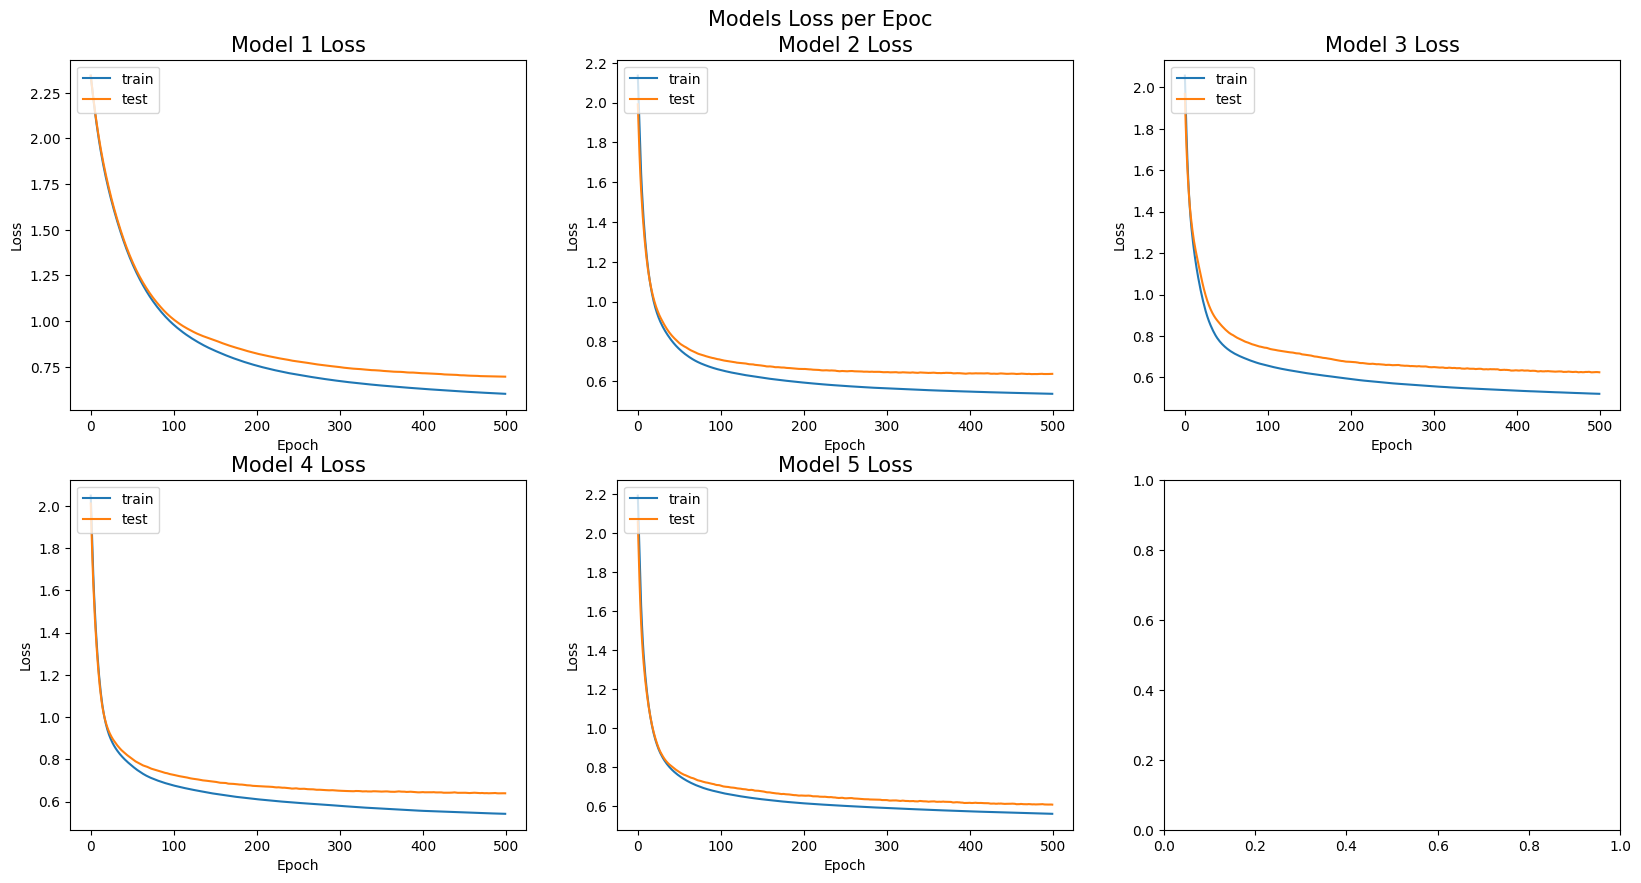

In [ ]:
plot_history(base_line_models_dict['history'],type='loss')

In [ ]:
# base_line_highest_acc = base_line_models_dict['models'][np.array(base_line_models_test_acc).argmax()]
pd.DataFrame(pd.Series(base_line_accuracies_dict)).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.756777,0.794196,0.780985,0.686275,0.745098,0.725847,0.720143,0.752228,0.737255


In [ ]:
# Calculate the Average confusion test matrix
cm = np.zeros(shape=(6,6))
for model in base_line_models_dict['models']:
    pred = model.predict(X_test_scaled).argmax(axis=1)
    cm += confusion_matrix(y_test_encoded, pred)
cm_avg = cm/ len(base_line_models_dict['models'])

18/18 [==============================] - 0s 2ms/step


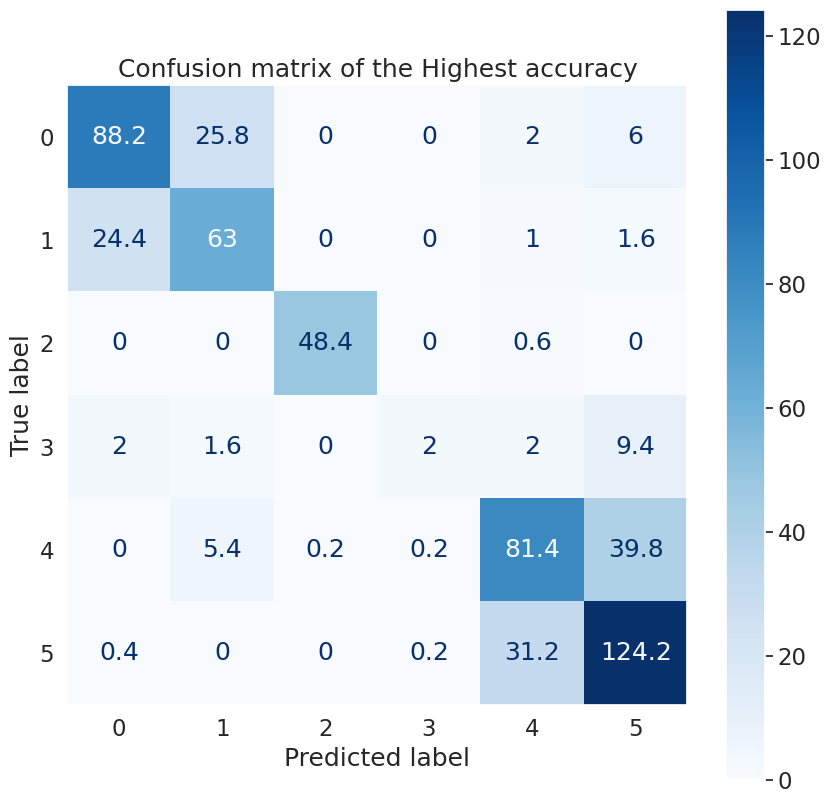

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
def TSNE_visualizer(data_set):
  tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
  z = tsne.fit_transform(data_set)
  return z

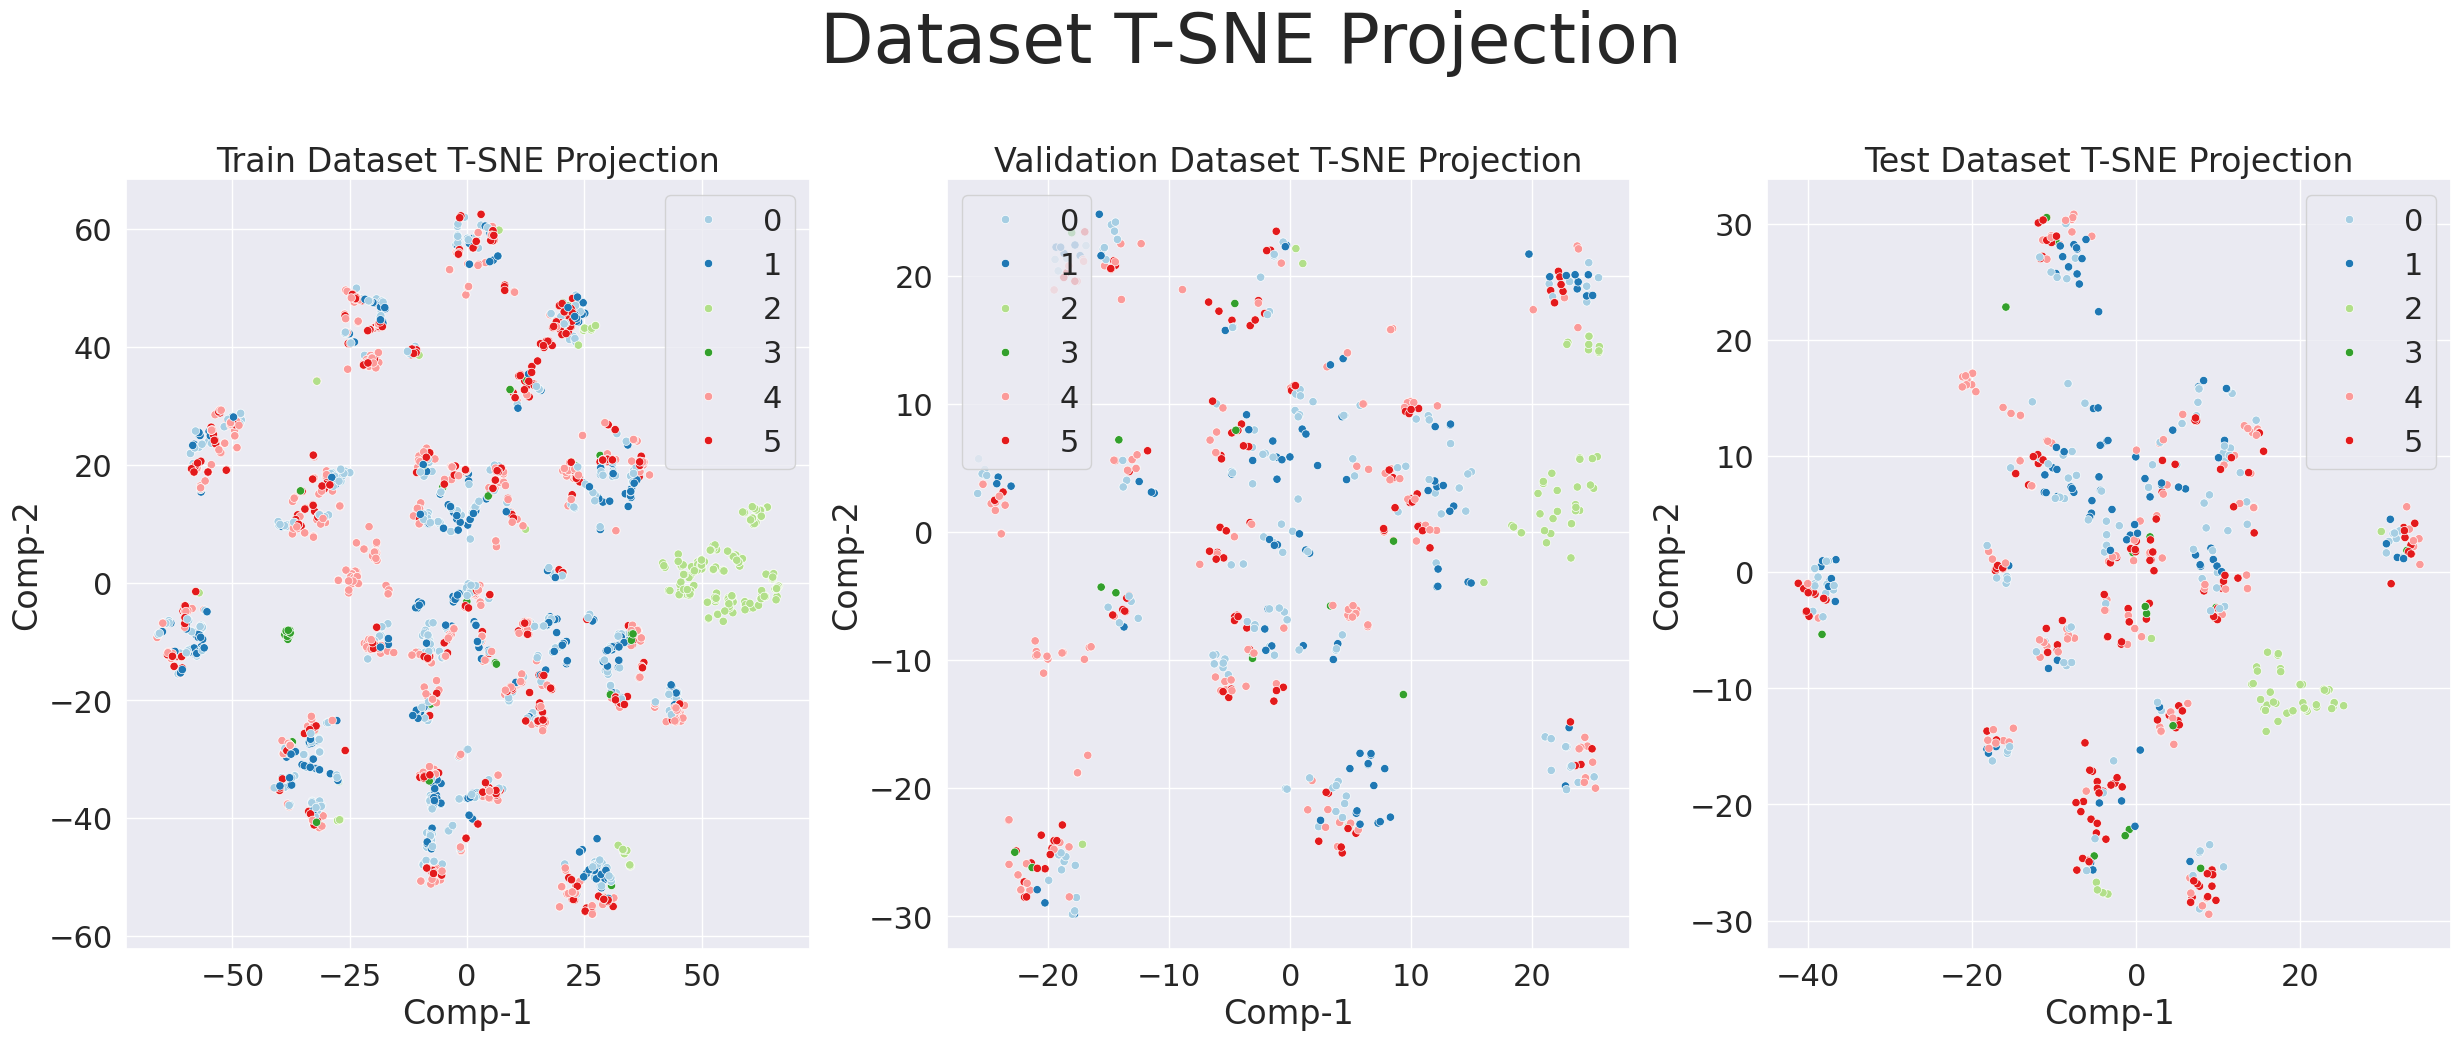

In [ ]:
# TSNE_visualizer(np.array(encoded_train, dtype='float'), y_train_ord, 'Training')
t_sne_plots = [TSNE_visualizer(np.array(X_train_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_val_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_test_scaled, dtype='float'))]

x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="Paired")
  # ax.scatter(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], c= c[i])
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp-1')
  ax.set_ylabel('Comp-2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

n_comp = range(2,34)
PCA_test_accuracies =[]
PCA_val_accuracies=[]
for i in n_comp:
    pca = PCA(n_components=i,random_state=0)
    pca_train = tf.convert_to_tensor(pca.fit_transform(X_train_scaled))
    pca_val = tf.convert_to_tensor(pca.transform(X_val_scaled))
    pca_test = tf.convert_to_tensor(pca.transform(X_test_scaled))
    pca_accuracies_dict, pca_models_dict,pca_models_train_acc,pca_models_test_acc,pca_models_valid_acc = Build_experment(pca_train, y_train_encoded, pca_val, y_val_encoded, pca_test, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5)

    PCA_test_accuracies.append(pca_accuracies_dict['AVG_test_acc'])
    PCA_val_accuracies.append(pca_accuracies_dict['AVG_valid_acc'])

18/18 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7344


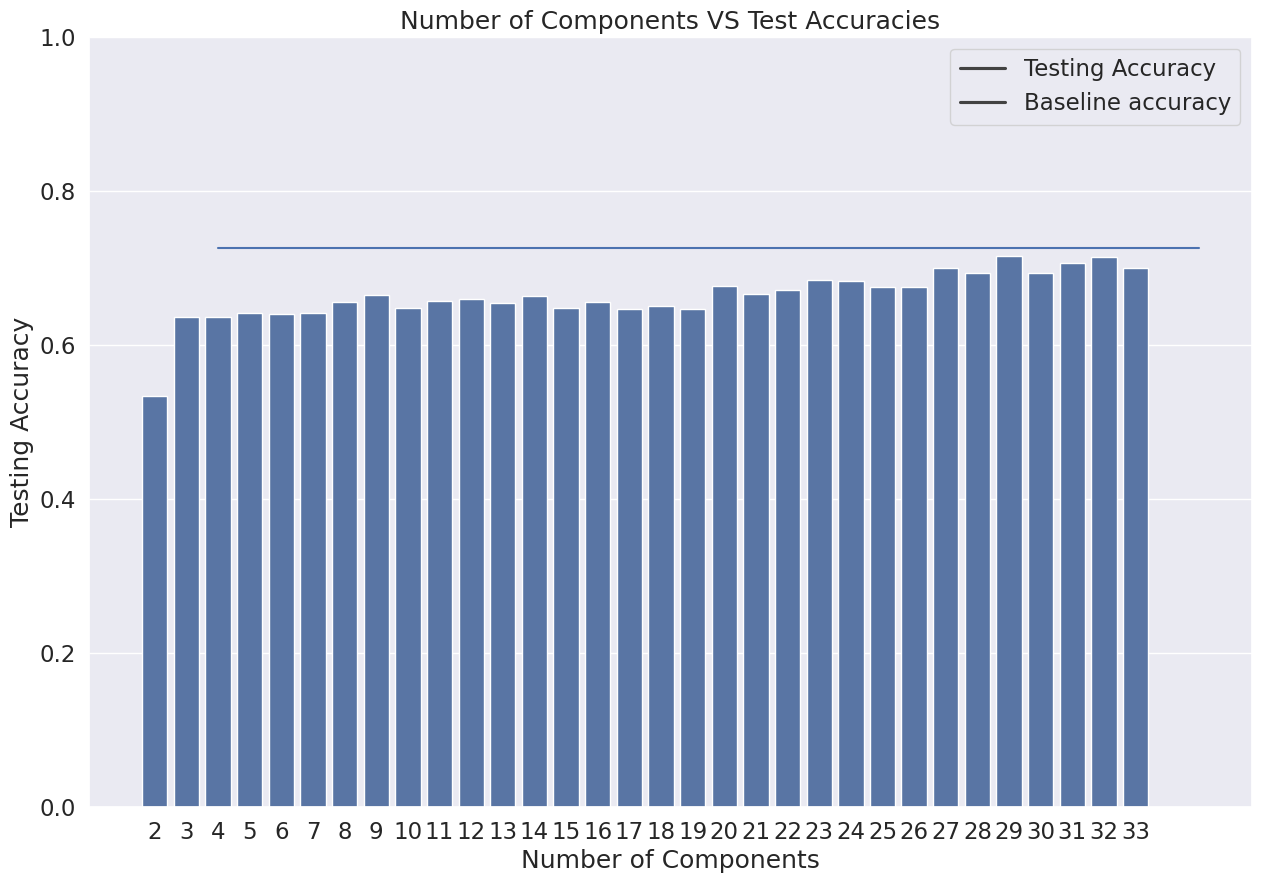

In [ ]:
import seaborn as sns
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)

sns.barplot(x=list(n_comp) , y = PCA_test_accuracies)
sns.lineplot(x= list(n_comp), y = [base_line_accuracies_dict["AVG_test_acc"]]*len(PCA_test_accuracies),sizes=[10]).set(title='Number of Components VS Test Accuracies')
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.legend(['Testing Accuracy','Baseline accuracy'])
plt.ylim(0,1)
plt.show()

In [ ]:
n_comp=list(n_comp)
best_n_com=n_comp[np.array(PCA_test_accuracies).argmax()]
best_n_com,max(PCA_test_accuracies)

(29, 0.716221034526825)

In [ ]:
pca = PCA(n_components=best_n_com)
pca_train = pca.fit_transform(X_train_scaled)
pca_val = pca.transform(X_val_scaled)
pca_test = pca.transform(X_test_scaled)

In [ ]:
t_sne_plots = [TSNE_visualizer(np.array(pca_train, dtype='float')),
               TSNE_visualizer(np.array(pca_val, dtype='float')),
               TSNE_visualizer(np.array(pca_test, dtype='float'))]

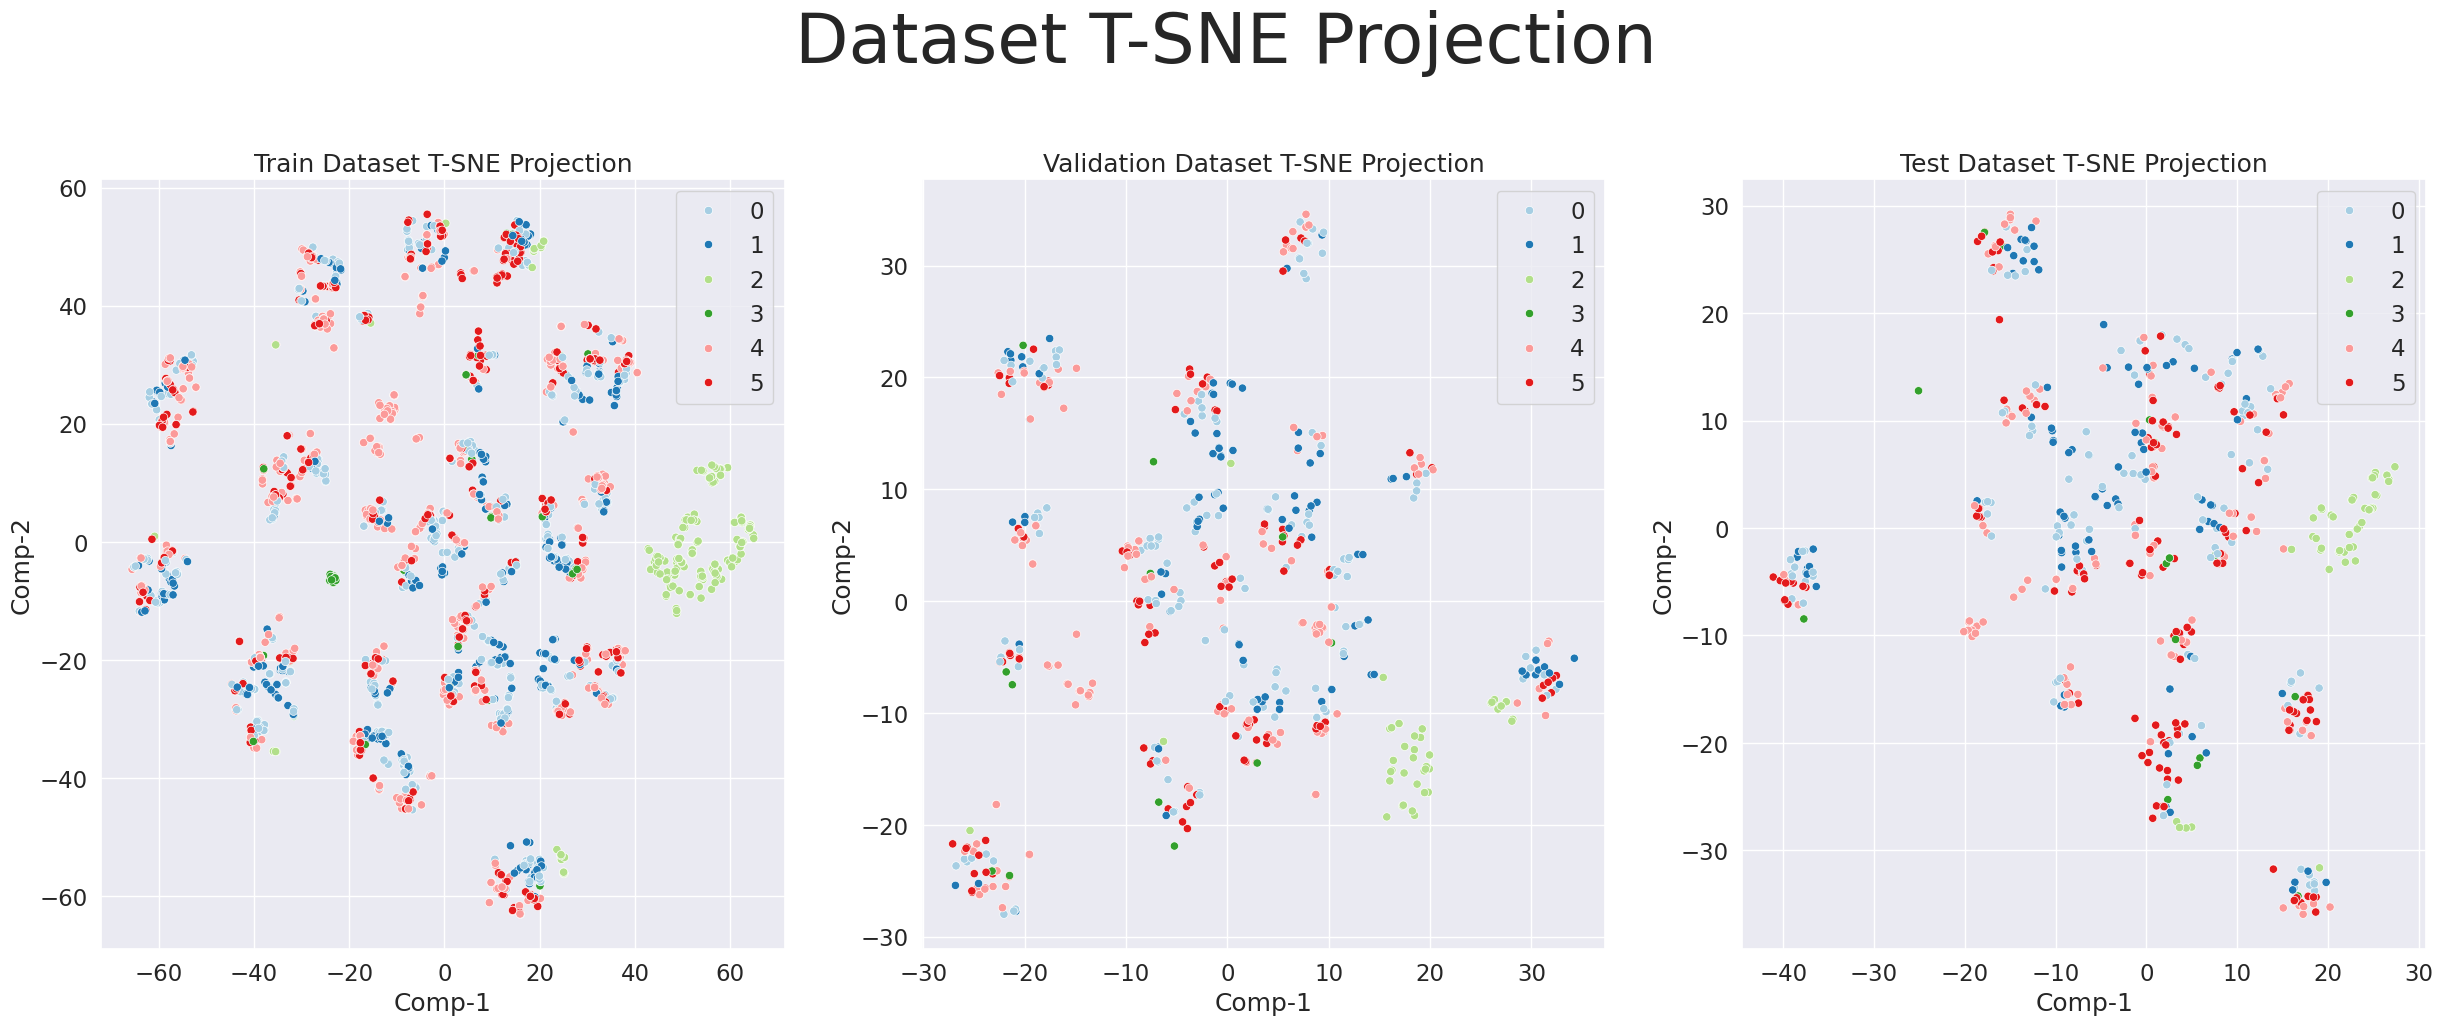

In [ ]:
x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="Paired")
  # ax.scatter(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], c= c[i])
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp-1')
  ax.set_ylabel('Comp-2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

n_features = X_train_scaled.shape[1]
def feature_selection(function,X_train,y_train,X_val,y_val,X_test,y_test):
    test_accuracies =[]
    val_accuracies=[]
    models=[]
    for i in range(1,n_features+1):
        k_best = SelectKBest(function, k=i)
        X_train_best=tf.convert_to_tensor(k_best.fit_transform(X_train,y_train))
        X_val_best=tf.convert_to_tensor(k_best.transform(X_val))
        X_test_best=tf.convert_to_tensor(k_best.transform(X_test))
        feature_selection_accuracies_dict, feature_selection_models_dict,feature_selection_models_train_acc,feature_selection_models_test_acc,feature_selection_models_valid_acc = Build_experment(X_train_best, y_train_encoded, X_val_best, y_val_encoded, X_test_best, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5)
        models.append(feature_selection_models_dict)
        test_accuracies.append(feature_selection_accuracies_dict['AVG_test_acc'])
        val_accuracies.append(feature_selection_accuracies_dict['AVG_valid_acc'])
    return test_accuracies,val_accuracies,models

In [ ]:
anova_test_accuracies,anova_val_accuracies,anova_models=feature_selection(f_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7255


<Axes: title={'center': 'Anova test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

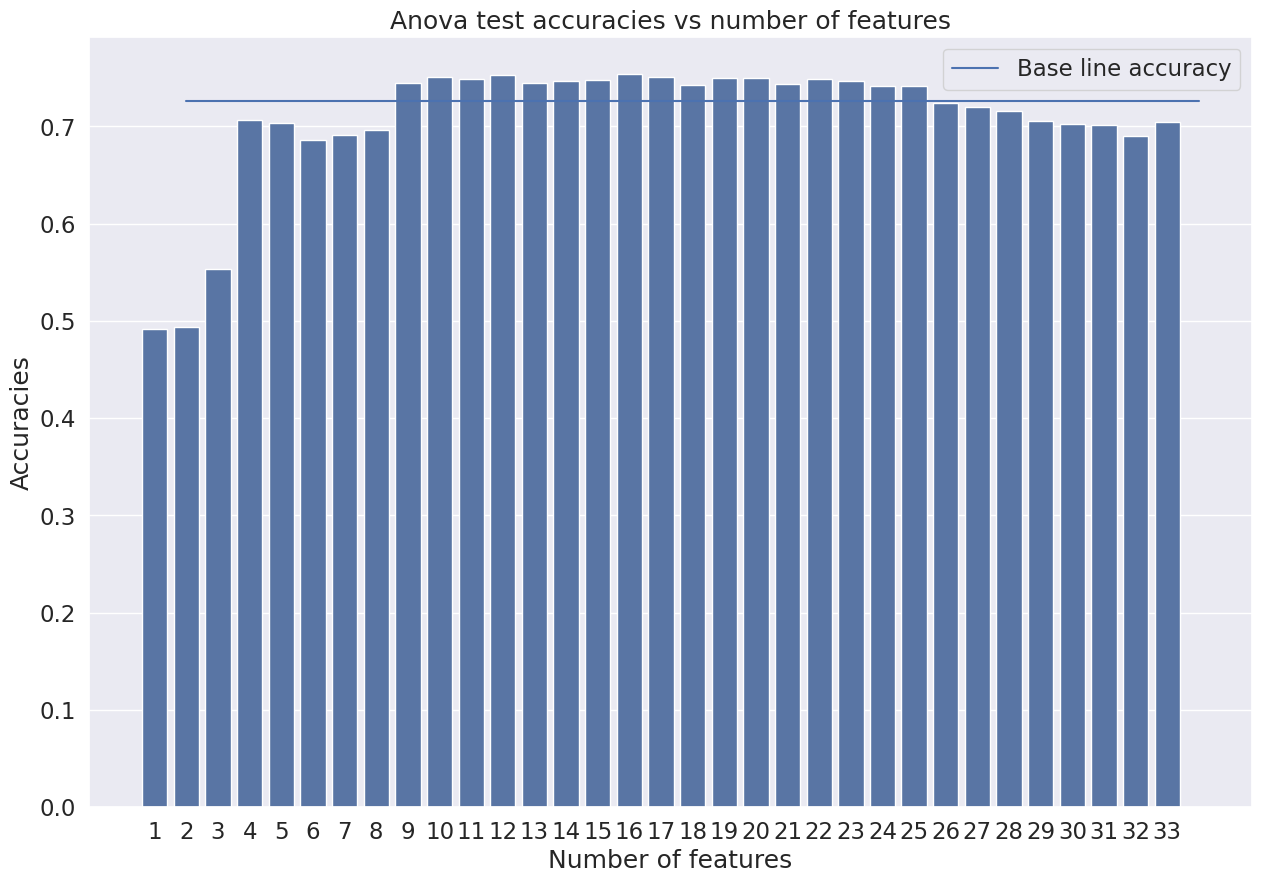

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=anova_test_accuracies).set(title='Anova test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')

In [ ]:
mutual_information_test_accuracies,mutual_information_val_accuracies,mutual_information_models=feature_selection(mutual_info_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.7291


<Axes: title={'center': 'Mutual information test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

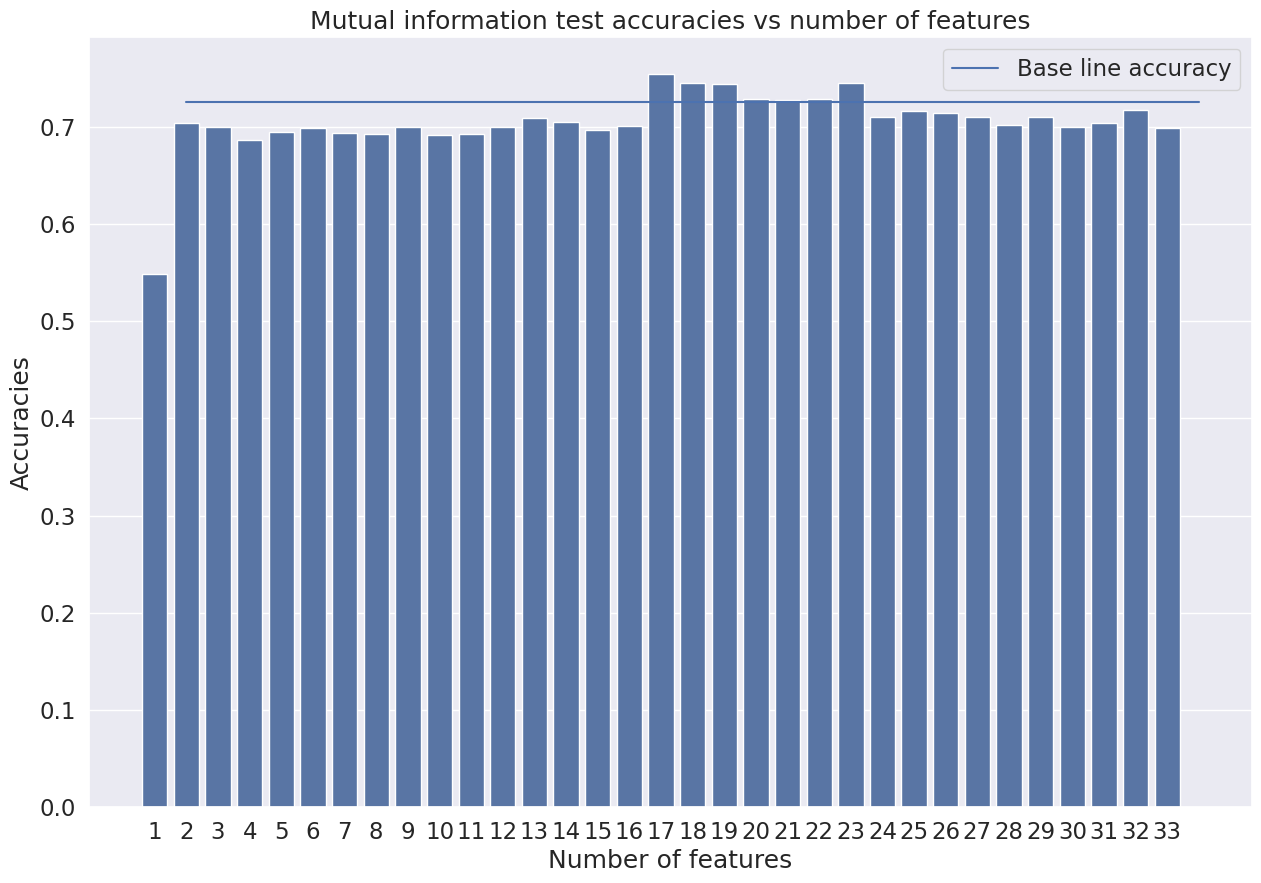

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=mutual_information_test_accuracies).set(title='Mutual information test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')

In [ ]:
max(anova_test_accuracies),max(mutual_information_test_accuracies)

(0.7540106892585754, 0.7543672084808349)

<Axes: >

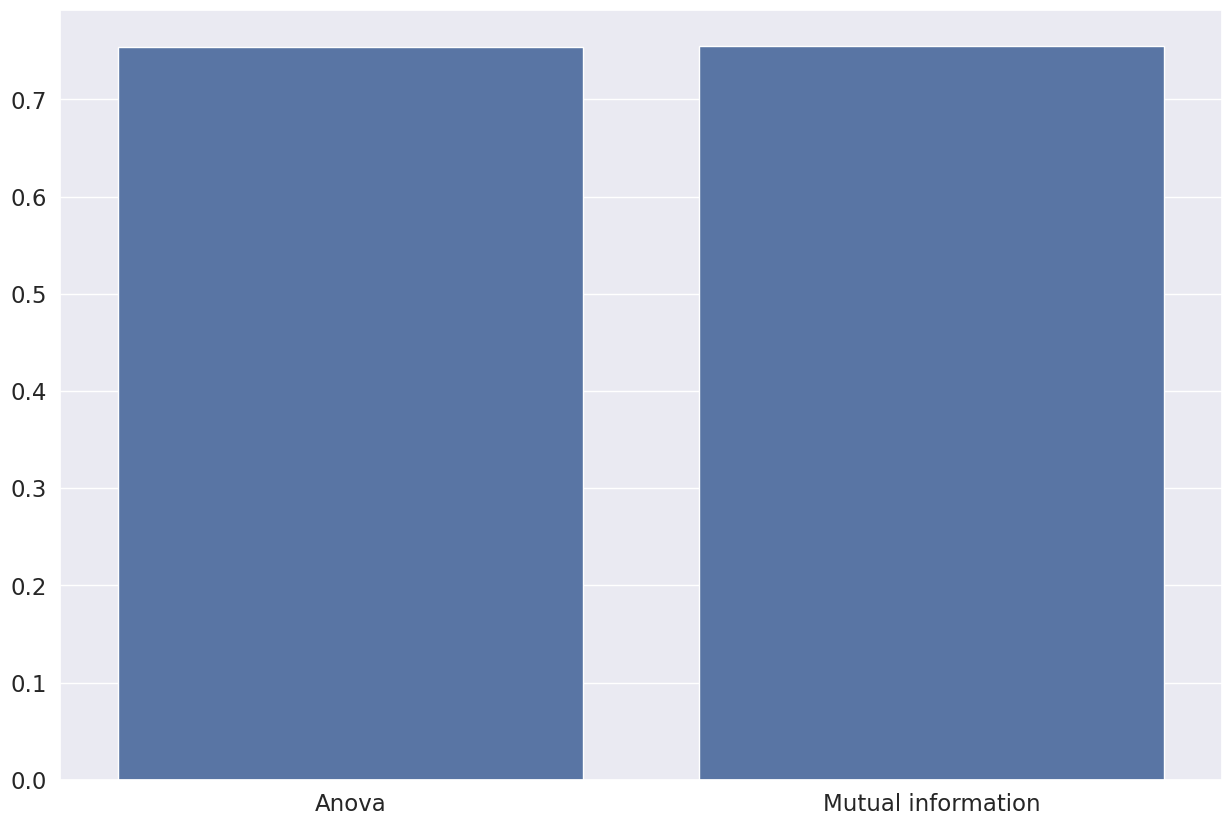

In [ ]:
sns.barplot(x=["Anova","Mutual information"],y=[max(anova_test_accuracies),max(mutual_information_test_accuracies)])

In [ ]:
n_features_arr=list(range(1,n_features+1))
best_n_feature_anova=n_features_arr[np.array(anova_test_accuracies).argmax()]
best_n_feature_anova

16

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova=k_best.transform(X_val_scaled)
X_test_best_anova=k_best.transform(X_test_scaled)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
X_train_best_anova_tsne= tsne.fit_transform(X_train_best_anova)
X_val_best_anova_tsne= tsne.fit_transform(X_val_best_anova)
X_test_best_anova_tsne= tsne.fit_transform(X_test_best_anova)
X_train_best_anova_tsne

array([[-45.99764  ,  -6.1203675],
       [-31.929836 , -39.661373 ],
       [ 45.32661  ,  25.123793 ],
       ...,
       [ 22.69393  ,  -2.193662 ],
       [ 19.701687 ,  58.34252  ],
       [ -6.896051 , -16.978394 ]], dtype=float32)

[Text(0.5, 1.0, 'Test Data after using anova with number of features = 11'),
 Text(0.5, 0, 'Feature1'),
 Text(0, 0.5, 'Feature2')]

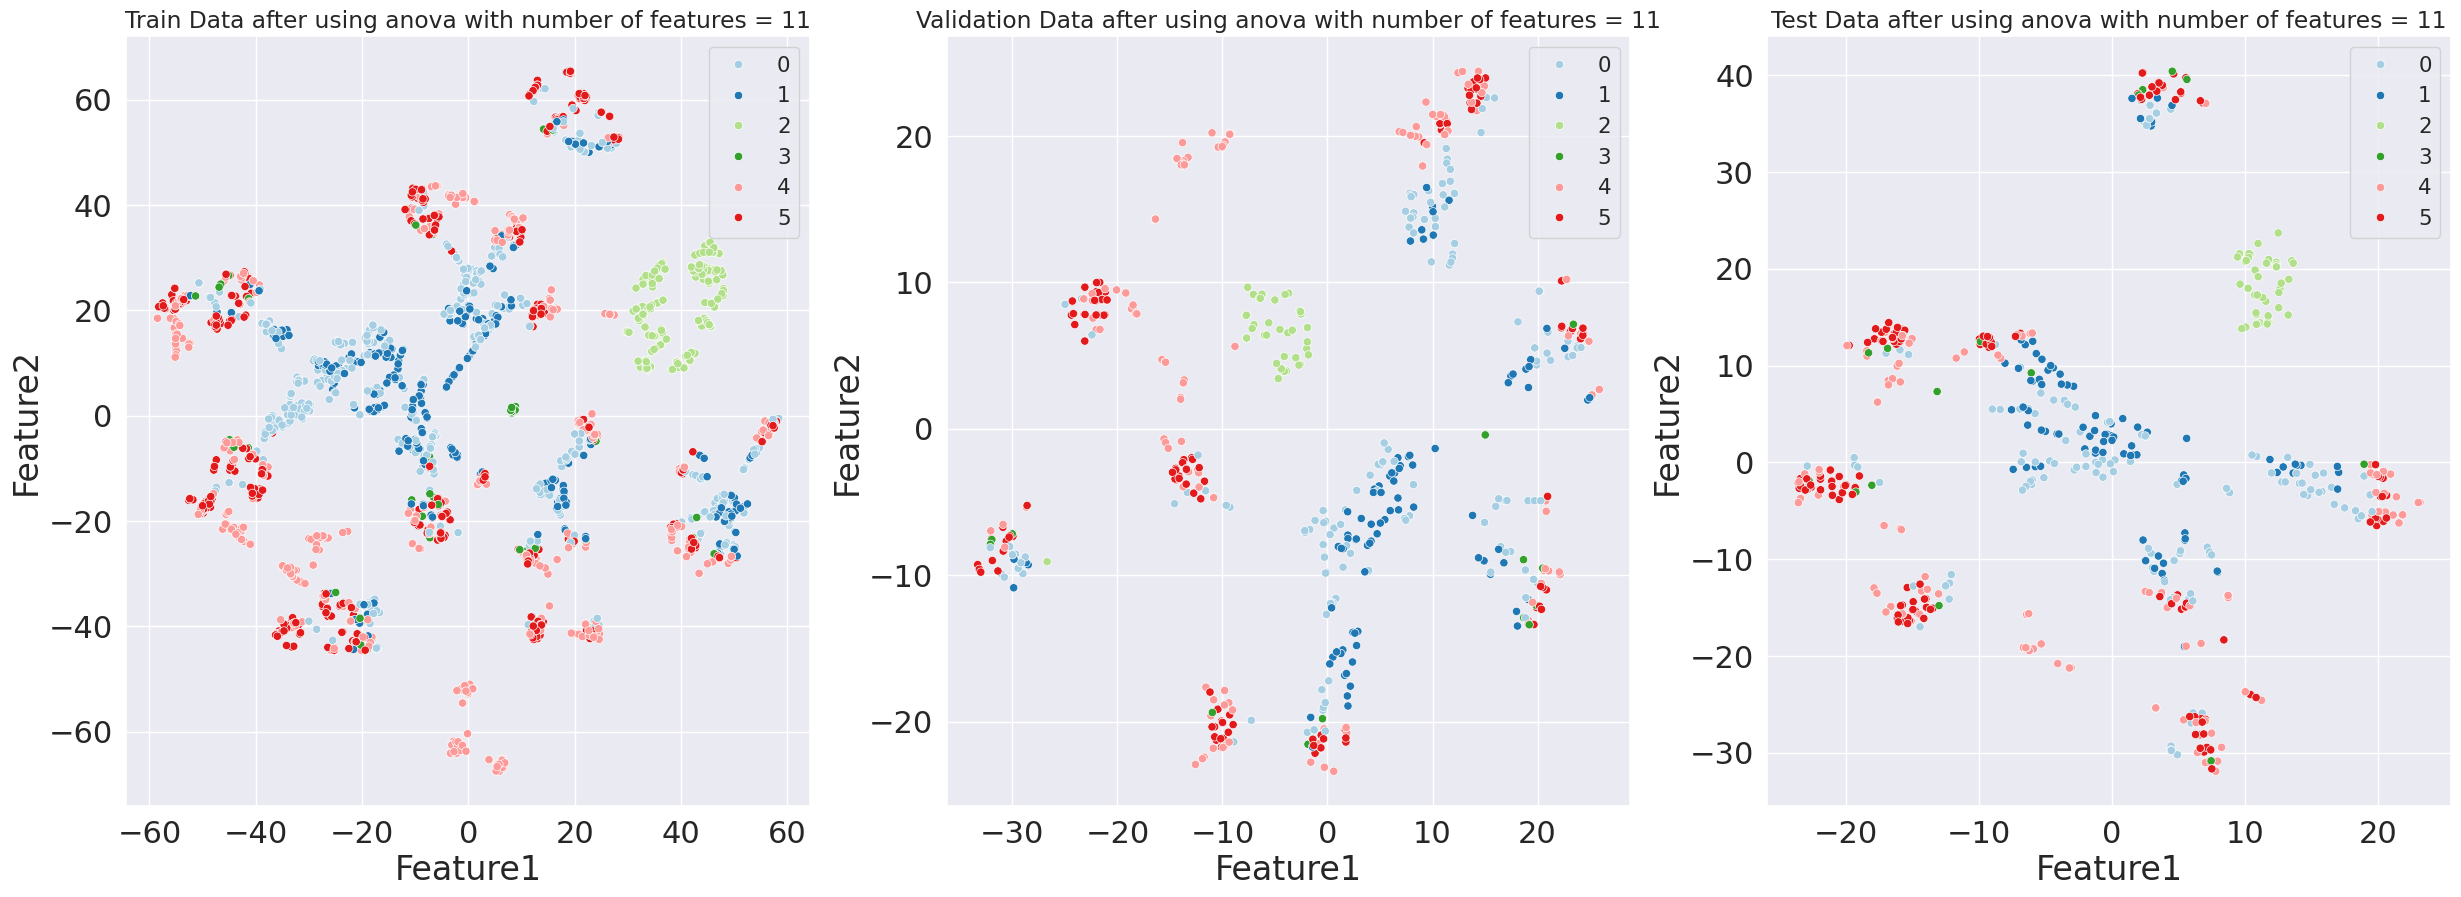

In [ ]:
figs,axis=plt.subplots(1,3,figsize=(30,10))
# sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.4)
sns.scatterplot(x=X_train_best_anova_tsne[:,0], y=X_train_best_anova_tsne[:,1], hue=y_train_encoded, ax=axis[0], palette="Paired").set(title='Train Data after using anova with number of features = 11', xlabel='Feature1', ylabel='Feature2')
sns.scatterplot(x=X_val_best_anova_tsne[:,0],y=X_val_best_anova_tsne[:,1],hue=y_val_encoded,ax=axis[1],palette="Paired").set(title='Validation Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')
sns.scatterplot(x=X_test_best_anova_tsne[:,0],y=X_test_best_anova_tsne[:,1],hue=y_test_encoded,ax=axis[2],palette="Paired").set(title='Test Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')

In [ ]:
max(anova_val_accuracies), max(PCA_val_accuracies)

(0.7525846719741821, 0.733689832687378)

Text(0, 0.5, 'Validation Accuracies')

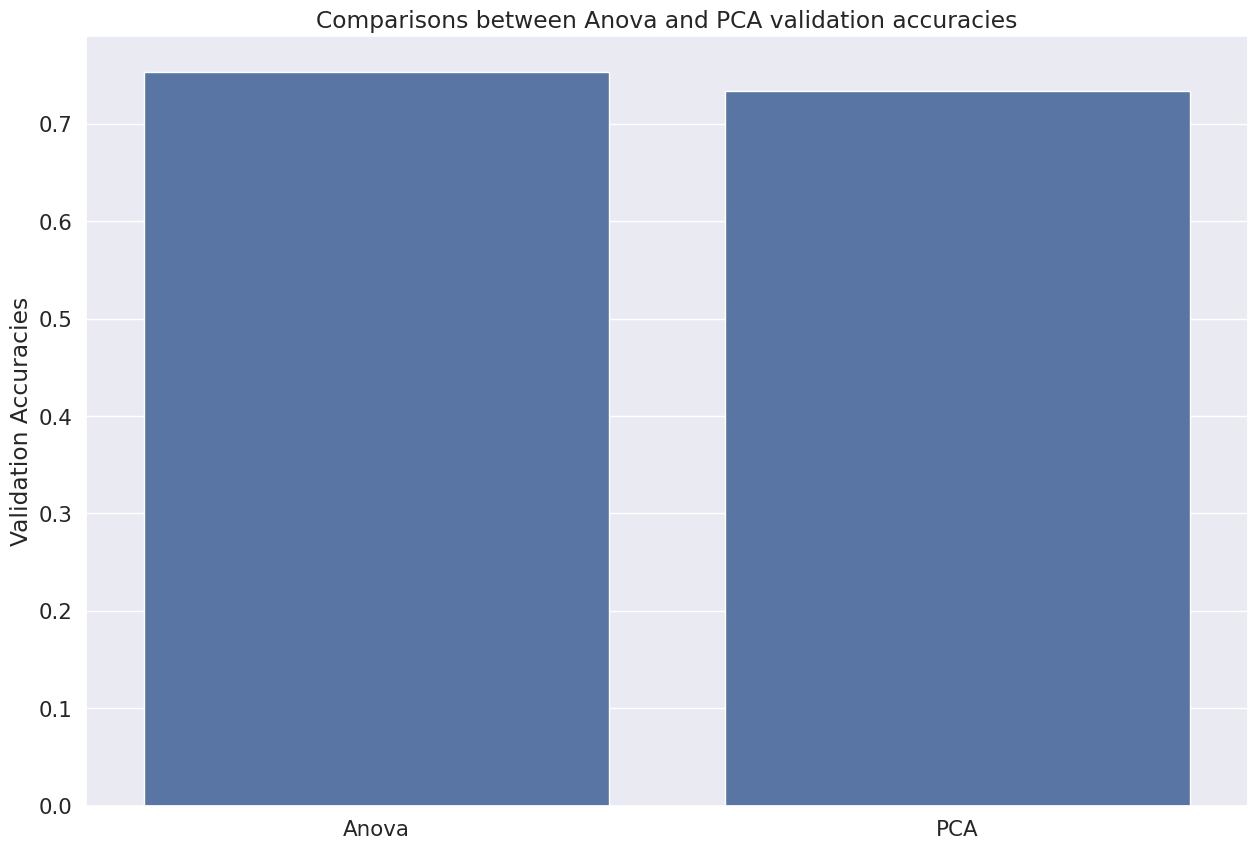

In [ ]:
sns.barplot(x=["Anova", "PCA"], y=[max(anova_val_accuracies), max(PCA_val_accuracies)])
plt.title('Comparisons between Anova and PCA validation accuracies')
plt.ylabel('Validation Accuracies')

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova_val=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova_val=k_best.transform(X_val_scaled)
X_test_best_anova_val=k_best.transform(X_test_scaled)

18/18 [==============================] - 0s 2ms/step


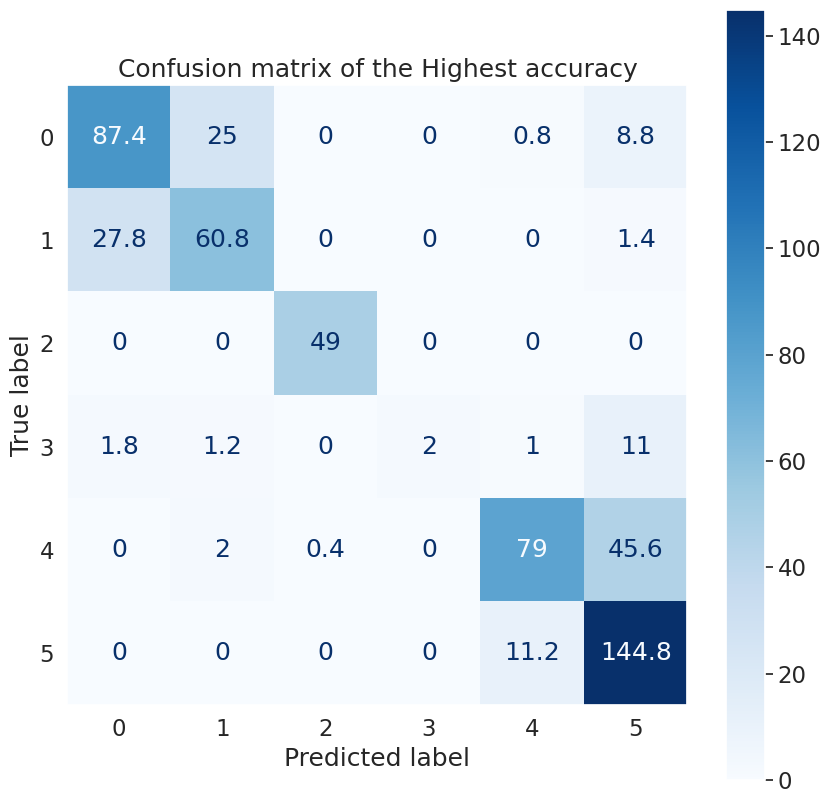

In [ ]:
idx_anova=np.array(anova_test_accuracies).argmax()
highest_val_anova_models=anova_models[idx_anova]

# Calculate the Average confusion test matrix
cm1 = np.zeros(shape=(6, 6))
for model in highest_val_anova_models['models']:
    pred = model.predict(X_test_best_anova_val).argmax(axis=1)
    cm1 += confusion_matrix(y_test_encoded, pred)
cm_avg_1 = cm1 / len(base_line_models_dict['models'])
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg_1, )
disp = disp.plot(cmap=plt.cm.Blues, values_format='g', )

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

In [ ]:
batches = [32,64,128]
batch_accuracies_dict_list = []
for batch_size in batches:
    batch_accuracies_dict, batch_models_dict,batch_models_train_acc,batch_models_test_acc,batch_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=batch_size, n_of_models=5)
    batch_accuracies_dict_list.append(batch_accuracies_dict)

18/18 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7790


In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[0])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.759068,0.778923,0.769301,0.761141,0.775401,0.766132,0.759358,0.796791,0.778253


In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[1])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.754486,0.781214,0.770141,0.754011,0.777184,0.767558,0.757576,0.784314,0.773619


In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[2])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.760214,0.778923,0.767545,0.759358,0.782531,0.767914,0.770053,0.778966,0.774332


In [ ]:
idx=np.array([batch_accuracies_dict_list[0]['AVG_valid_acc'],batch_accuracies_dict_list[1]['AVG_valid_acc'],batch_accuracies_dict_list[2]['AVG_valid_acc']]).argmax()
best_batch_size=batches[idx]
best_batch_size

32

In [ ]:
n_hidden_layers = [1,2,4,8]
n_neurons = [10,20,30,40]
hidden_accuracies_dict_list = {1:[],2:[],4:[],8:[]}

for n_hidden in n_hidden_layers:
    for n_neuron in n_neurons:
        hidden_accuracies_dict, hidden_models_dict,hidden_models_train_acc,hidden_models_test_acc,hidden_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=n_hidden, n_neurons=n_neuron, activation='relu', epochs=500, batch_size=best_batch_size, n_of_models=5)
        hidden_accuracies_dict_list[n_hidden].append(hidden_accuracies_dict)

18/18 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8021


In [ ]:
hidden_layers_1=pd.DataFrame(hidden_accuracies_dict_list[1])
hidden_layers_1

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.758687,0.774723,0.766094,0.752228,0.777184,0.763280,0.764706,0.787879,0.778253
1,0.768232,0.786178,0.779076,0.762923,0.778966,0.771123,0.775401,0.816399,0.790018
2,0.771287,0.793051,0.781825,0.768271,0.778966,0.773975,0.770053,0.795009,0.783601
3,0.773960,0.789996,0.780985,0.755793,0.782531,0.766845,0.777184,0.802139,0.787879


In [ ]:
hidden_layers_2=pd.DataFrame(hidden_accuracies_dict_list[2])
hidden_layers_2

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.756777,0.780832,0.772050,0.748663,0.782531,0.765775,0.761141,0.787879,0.776827
1,0.780451,0.800305,0.787858,0.768271,0.789661,0.780036,0.773619,0.800357,0.784670
2,0.791142,0.808706,0.796029,0.771836,0.787879,0.781462,0.795009,0.807487,0.800000
3,0.794196,0.809851,0.801069,0.780749,0.802139,0.787166,0.780749,0.802139,0.793583


In [ ]:
hidden_layers_4=pd.DataFrame(hidden_accuracies_dict_list[4])
hidden_layers_4

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.772050,0.782741,0.776250,0.764706,0.791444,0.772906,0.766488,0.795009,0.782888
1,0.791905,0.797251,0.795265,0.757576,0.789661,0.776114,0.791444,0.805704,0.798574
2,0.781978,0.808706,0.802138,0.764706,0.809269,0.793226,0.786096,0.823529,0.806417
3,0.801451,0.815960,0.810844,0.789661,0.825312,0.805348,0.791444,0.818182,0.805348


In [ ]:
hidden_layers_8=pd.DataFrame(hidden_accuracies_dict_list[8])
hidden_layers_8

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.736159,0.794196,0.766399,0.746881,0.803922,0.767201,0.748663,0.796791,0.775758
1,0.783887,0.826651,0.796411,0.780749,0.812834,0.796078,0.782531,0.802139,0.792513
2,0.745323,0.827797,0.797938,0.761141,0.809269,0.796435,0.764706,0.830660,0.804991
3,0.805269,0.821688,0.811989,0.796791,0.812834,0.804278,0.802139,0.819964,0.810339


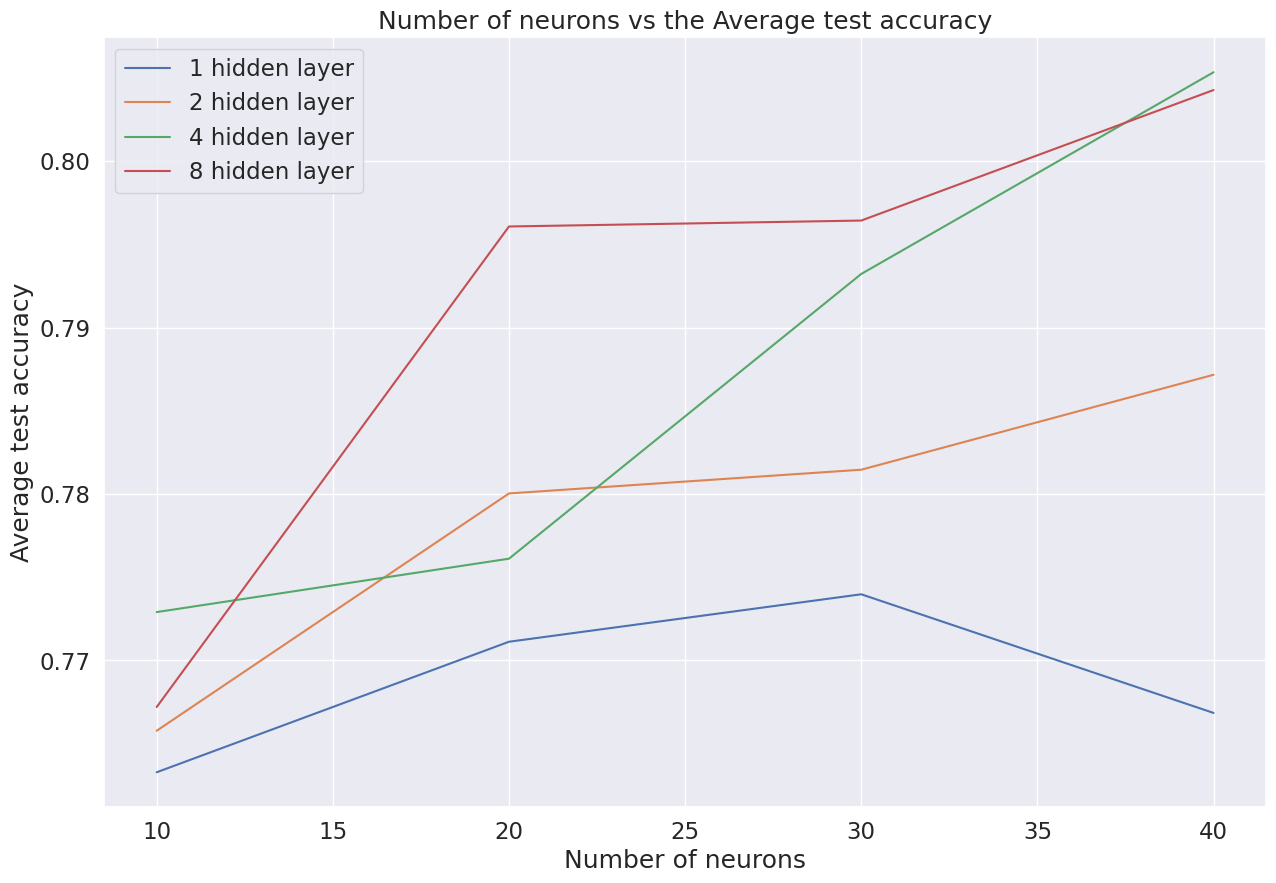

In [ ]:
sns.lineplot(x=n_neurons,y=hidden_layers_1['AVG_test_acc'],label='1 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_2['AVG_test_acc'],label='2 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_4['AVG_test_acc'],label='4 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_8['AVG_test_acc'],label='8 hidden layer')
plt.title('Number of neurons vs the Average test accuracy')
plt.xlabel('Number of neurons')
plt.ylabel('Average test accuracy')
plt.show()

In [ ]:
maxi=-99999
best_neurons=-9999
best_hidden=-9999
hidden_layers_list=[hidden_layers_1,hidden_layers_2,hidden_layers_4,hidden_layers_8]
for i,hidden_layer in enumerate(hidden_layers_list) :
    if max(hidden_layer['AVG_valid_acc']) >maxi :
        maxi=max(hidden_layer['AVG_valid_acc'])
        idx=np.array(hidden_layer['AVG_valid_acc']).argmax()
        best_neurons=n_neurons[idx]
        best_hidden=n_hidden_layers[i]
best_neurons,best_hidden

(40, 8)